In [144]:
# load required packages
import nltk
from nltk.corpus import PlaintextCorpusReader
import pandas as pd
import re
import matplotlib.pyplot as plt
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\Mr.
[nltk_data]     Priyan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#change path below to folder where you place the files
corpus_path = "C:\\Users\\Mr. Priyan\\Dropbox\\Data Science\\DDL\\company_profiles" 

In [4]:
corpus = PlaintextCorpusReader(corpus_path, ".*\.txt")

In [5]:
print("Company Profile Corpus Statistics")
print("Number of profiles: " + str(len(corpus.fileids())))
print("Number of paragraphs: " + str(len(corpus.paras())))
print("Number of sentences: " + str(len(corpus.sents())))
print("Number of words: " + str(len(corpus.words())))

Company Profile Corpus Statistics
Number of profiles: 3558
Number of paragraphs: 3558
Number of sentences: 23988
Number of words: 790836


In [6]:
list_corpus = []
#Converting corpus to list of lists
for i in range(0,len(corpus.fileids())):
    list_corpus.append(list(corpus.words(corpus.fileids()[i])))

In [242]:
# Preprocessing
#commenting everything as I had already saved new_corpus after the first time. 
# creating a list called common_words to remove from corpus
common_words = ['product','products','service','services','solution','solutions','segment','segments','offering','offerings',\
                'market','markets','provide','provides','provided','industry','industries','sells','sell','sold','state',\
                'states','headquarter','headquarters','headquartered']
#import time
#start = time.time()

new_corpus = []    
for i in range(0,len(list_corpus)):
    #remove punctuation
    review = re.sub('[^a-zA-Z]', ' ', str(list_corpus[i]))
    #convert all to lowercase
    review = review.lower()
    review = review.split()
    #stemming
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english')) if not word in set(common_words)]
    review = ' '.join(review)
    new_corpus.append(review)

#end = time.time()
#print(end - start)


In [42]:
# to store the new_corpus list instead of having to run it each time 
#%store new_corpus (without common words being filtered out)


In [244]:
#restoring new_corpus which was stored already
#%store -r 

In [245]:
#checking the content of a random document from new_corpus and comparing it to original description
import random
rand_num = random.randrange(1,3559,1)
print("Original description:")
print(' '.join(corpus.words(corpus.fileids()[rand_num])))
print()
print("After pre-processing:")
print(new_corpus[rand_num])
print()

Original description:
Cboe Global Markets , Inc ., through its subsidiaries , operates as an options exchange in the United States . The company operates in five segments : Options , U . S . Equities , Futures , European Equities , and Global FX . The Options segment trades in listed market indexes . The U . S . Equities segment trades in listed cash equities ; and provides exchange - traded products ( ETP ) transaction and ETP listing services . The Futures segment trades in futures , bitcoins , and other products . The European Equities segment trades in pan - European listed equities transaction services , ETPs , exchange - traded commodities , and international depository receipts . The Global FX segment provides institutional foreign exchange ( FX ) and non - deliverable forward FX transactions services . It has strategic relationships with S & P Dow Jones Indices , LLC ; Frank Russell Company ; FTSE International Limited ; MSCI Inc .; DJI Opco , LLC ; Cboe Vest Financial Group , 

In [246]:
import pandas as pd
df = pd.read_csv('company_info.csv')

TD-IDF 

In [247]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
#original: max_df=0.8, min_df=0.05, max_features=200000
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=0.05, max_features=200000,
                                 stop_words='english',
                                 use_idf=True, tokenizer=None, ngram_range=(1,3))
#fit the vectorizer to corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(new_corpus) 

In [248]:
# to see shape of tfidf matrix
tfidf_matrix.shape

(3558, 319)

In [249]:
#tdidf feature names
terms = tfidf_vectorizer.get_feature_names()

In [250]:
terms

['access',
 'accessori',
 'account',
 'acquir',
 'acquisit',
 'activ',
 'addit',
 'addit compani',
 'addit compani offer',
 'addit offer',
 'administr',
 'agenc',
 'agent',
 'agreement',
 'agricultur',
 'air',
 'america',
 'analyt',
 'applic',
 'approxim',
 'area',
 'asia',
 'asset',
 'associ',
 'autom',
 'automobil',
 'automot',
 'bank',
 'bank hold',
 'bank hold compani',
 'base',
 'biopharmaceut',
 'branch',
 'brand',
 'brokerag',
 'build',
 'busi',
 'california',
 'canada',
 'cancer',
 'candid',
 'capit',
 'card',
 'care',
 'cash',
 'center',
 'central',
 'certif',
 'certif deposit',
 'chain',
 'chang',
 'channel',
 'check',
 'chemic',
 'citi',
 'client',
 'clinic',
 'cloud',
 'collabor',
 'collect',
 'com',
 'commerci',
 'commerci industri',
 'commerci real',
 'commerci real estat',
 'commun',
 'compani base',
 'compani develop',
 'compani focus',
 'compani formerli',
 'compani formerli known',
 'compani offer',
 'compani oper',
 'compani serv',
 'compon',
 'compris',
 'comput',
 

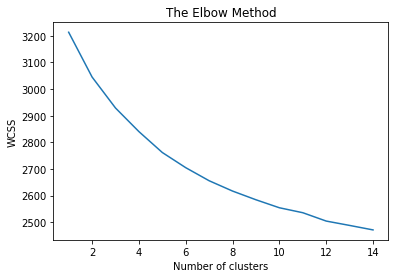

In [263]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [251]:
# Kmeans Clustering
from sklearn.cluster import KMeans
num_clusters = 5
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

In [252]:
# saving the clustering model
from sklearn.externals import joblib

#uncomment the below to save your model 
#joblib.dump(km,  'doc_5clusters.pkl')
#since I've already run my model I am loading from the pickle
#Uncomment to load the model with 4 clusters without common words filtered out
#km = joblib.load('doc_cluster.pkl')
#Uncomment to load the model with 5 clusters - without common words filtered out
#km = joblib.load('doc_5clusters.pkl')
#clusters = km.labels_.tolist()

In [253]:
# creating a dataframe which contains additional information about each company
df = pd.read_csv("C:\\Users\\Mr. Priyan\\Dropbox\\Data Science\\DDL\\company_info.csv")
df.sample(5)

,Ticker,Company,Sector,Industry,Country
1396,CSM,ProShares Large Cap Core Plus,Financial,Exchange Traded Fund,USA
4461,NECB,"Northeast Community Bancorp, Inc.",Financial,Savings & Loans,USA
2479,FOF,"Cohen & Steers Closed-End Opportunity Fund, Inc.",Financial,Closed-End Fund - Equity,USA
462,ATVI,"Activision Blizzard, Inc.",Technology,Multimedia & Graphics Software,USA
5643,SBR,Sabine Royalty Trust,Financial,Diversified Investments,USA


In [254]:
# Creating a dataframe that contains the company ticker along with the cluster number
df_corpus = pd.DataFrame({'Ticker':corpus.fileids(), 'Clusters':clusters})
df_corpus.head(5)

,Clusters,Ticker
0,2,A-profile.txt
1,2,AA-profile.txt
2,1,AAC-profile.txt
3,2,AAL-profile.txt
4,4,AAMC-profile.txt


In [255]:
# Removing the "-profile.txt" from the Ticker
import re
for i in range(0,len(df_corpus)):
    df_corpus.loc[i,'Ticker']=re.sub("-profile.txt","",df_corpus.loc[i,'Ticker'])
df_corpus.head(5)

,Clusters,Ticker
0,2,A
1,2,AA
2,1,AAC
3,2,AAL
4,4,AAMC


In [256]:
# merging the two dataframe on the Ticker
merged_df = pd.merge(left=df, right=df_corpus, how='inner', on="Ticker")

In [257]:
merged_df.sample(5)

,Ticker,Company,Sector,Industry,Country,Clusters
398,BHAC,Barington/Hilco Acquisition Corp.,Conglomerates,Conglomerates,USA,2
512,BZH,Beazer Homes USA Inc.,Industrial Goods,Residential Construction,USA,2
1651,IIVI,II-VI Incorporated,Technology,Scientific & Technical Instruments,USA,2
3137,TLGT,"Teligent, Inc.",Healthcare,Biotechnology,USA,2
1711,IRDM,Iridium Communications Inc.,Technology,Diversified Communication Services,USA,2


In [258]:
# Printing the most recurring Sector(taken from previous dataframe) in each cluster
for i in range(num_clusters):
    print("Cluster",i+1,":",merged_df[merged_df.Clusters==i].Sector.mode()[0],":- % correct categories is ", \
    round(len(merged_df[merged_df.Clusters==i][merged_df[merged_df.Clusters==i].Sector==\
    merged_df[merged_df.Clusters==i].Sector.mode()[0]])/len(merged_df[merged_df.Clusters==i])*100,2))   

Cluster 1 : Basic Materials :- % correct categories is  66.45
Cluster 2 : Healthcare :- % correct categories is  98.57
Cluster 3 : Services :- % correct categories is  26.45
Cluster 4 : Financial :- % correct categories is  98.94
Cluster 5 : Financial :- % correct categories is  93.14


In [259]:
merged_df.Clusters.value_counts()

2    2140
4     379
3     376
1     350
0     313
Name: Clusters, dtype: int64

In [264]:
from __future__ import print_function
print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
for i in range(num_clusters):
    print("Cluster %d words:" % int(i+1), end='')
    
    for ind in range(0,6): # top 6 words per cluster
        print(' %s' % terms[order_centroids[i,ind]], end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d Companies:" % int(i+1), end='')
    #print()
    for title in merged_df[merged_df['Clusters']==i]["Company"].sample(10).values.tolist():
        print(' %s,' % title, end='')
        #uncomment below to see the Sector and Industry of each Company
        #print("Sector:",merged_df.Sector[merged_df.Company==title].values[0],"Industry:",merged_df.Industry[merged_df.Company==title].values[0])
    print() #add whitespace
    print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 1 words: ga, oil, natur ga, natur, energi, texa,

Cluster 1 Companies: NRG Energy, Inc., Williams Partners L.P., Western Gas Equity Partners, LP, RPC Inc., Transmontaigne Partners L.P., Independence Contract Drilling, Inc., Diamond Offshore Drilling, Inc., Sempra Energy, Calumet Specialty Products Partners LP, UGI Corporation,

Cluster 2 words: treatment, clinic, develop, phase, trial, diseas,

Cluster 2 Companies: Acura Pharmaceuticals, Inc., Emergent BioSolutions, Inc., PLx Pharma Inc., Syros Pharmaceuticals, Inc., The Medicines Company, Acorda Therapeutics, Inc., Evoke Pharma, Inc., BioDelivery Sciences International, Inc., Ironwood Pharmaceuticals, Inc., Agenus Inc.,

Cluster 3 words: oper, offer, manufactur, brand, manag, includ,

Cluster 3 Companies: Electro Scientific Industries Inc., Leggett & Platt, Incorporated, KEMET Corp., Odyssey Marine Exploration Inc., Nortech Systems Inc., Expeditors International of Washington Inc., Thermon Group Holding

In [78]:
# rough work
# to find the 1st common term for cluster 0
#terms[order_centroids[0,0]]
#merged_df[merged_df['Clusters']==i]["Company"][0:5].values.tolist()
#order_centroids shape is 4x360 ie., 360 features from tdidf and 4 clusters from KNN
#terms[order_centroids[0,14]]
#import random    
#my_randoms=[]    
#for i in range (10):    
    #my_randoms.append(random.randrange(1,3559,1))    
    #print (my_randoms)  
#my_randoms
#title1 = merged_df[merged_df['Clusters']==0]["Company"].sample(1).values.tolist()
#merged_df.Sector[merged_df.Company=="Independent Bank Corporation"].values[0]
# Take separate dataframe according to each cluster
#Cluster0=merged_df[merged_df.Clusters==0]
#Cluster1=merged_df[merged_df.Clusters==1]
#Cluster2=merged_df[merged_df.Clusters==2]
#Cluster3=merged_df[merged_df.Clusters==3]
#print("Cluster0:",Cluster0.Sector.mode()[0],":- % correct categories is ",round(len(Cluster0[Cluster0.Sector==Cluster0.Sector.mode()[0]])/len(Cluster0)*100,2))
#print("Cluster1:",Cluster1.Sector.mode()[0],":- % correct categories is ",round(len(Cluster1[Cluster1.Sector==Cluster1.Sector.mode()[0]])/len(Cluster1)*100,2))
#print("Cluster2:",Cluster2.Sector.mode()[0],":- % correct categories is ",round(len(Cluster2[Cluster2.Sector==Cluster2.Sector.mode()[0]])/len(Cluster2)*100,2))
#print("Cluster3:",Cluster3.Sector.mode()[0],":- % correct categories is ",round(len(Cluster3[Cluster3.Sector==Cluster3.Sector.mode()[0]])/len(Cluster3)*100,2))
#print() #add whitespace
#print() #add whitespace